In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

#### set file directory

In [2]:
file_dir = r'C:\Users\hasna\anaconda3\envs'

### Data preparation and pre-processing

####  Loading data

In [3]:
df_train = pd.read_csv(file_dir+r'\train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test = pd.read_csv(file_dir+r'\test.csv')
df_test


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking for missing values

In [5]:
df_train.isna().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
df_test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:, 0]
print(X.shape, y.shape)

(42000, 784) (42000,)


#### Data and target class visualizations

<AxesSubplot:>

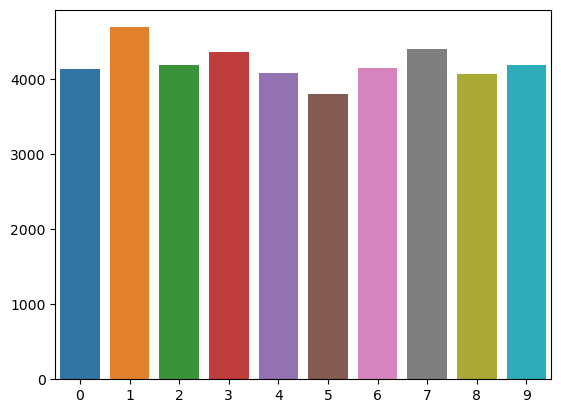

In [9]:
sns.barplot(x=y.value_counts().index, y=y.value_counts().values)

(28, 28)


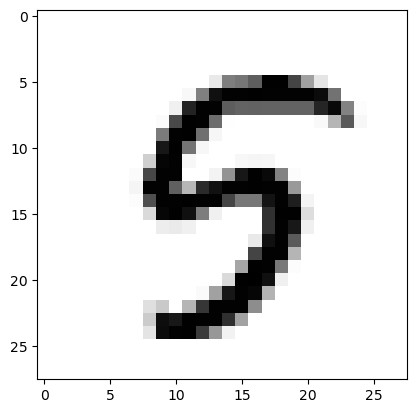

In [10]:
z = np.reshape(X.iloc[8].values, (28,28))
print(z.shape)
plt.imshow(z, cmap='Greys')

#### Creating training and validation sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=15)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(37800, 784) (4200, 784) (37800,) (4200,)


#### Pre-processing pipelines

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
class ReshapeFunc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.reshape((-1,28,28,1))
        return X

In [16]:
features_pipeline = Pipeline(steps=[
    ('Normalize', MinMaxScaler()),
    ('Reshape', ReshapeFunc())
])

In [17]:
X_train = features_pipeline.fit_transform(X_train)

In [18]:
from sklearn.preprocessing import OneHotEncoder
target_pipeline = Pipeline(steps=[
    ('OneHot', OneHotEncoder())
])

In [19]:
y_train = target_pipeline.fit_transform(y_train.values.reshape(-1,1))

In [20]:
y_train = y_train.toarray()

In [21]:
print(X_train.shape, y_train.shape)

(37800, 28, 28, 1) (37800, 10)


In [22]:
X_val = features_pipeline.fit_transform(X_val)
y_val = target_pipeline.fit_transform(y_val.values.reshape(-1, 1))
y_val = y_val.toarray()
print(X_val.shape, y_val.shape)

(4200, 28, 28, 1) (4200, 10)


In [23]:
X_test = features_pipeline.fit_transform(df_test)

#### Custom f1, recall and precision metrics

In [24]:
from keras import backend as K

In [25]:
# Precision (using keras backend)
def precision_metric(y_true, y_pred):
    threshold = 0.5  # Training threshold 0.5
    y_pred_y = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    precision = true_positives / (true_positives + false_positives + K.epsilon())
    return precision

# Recall (using keras backend)
def recall_metric(y_true, y_pred):
    threshold = 0.5 #Training threshold 0.5
    y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    return recall

# F1-score (using keras backend)
def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (recall+precision+K.epsilon()))
    return f1

### Building network and training

####  Building network

In [26]:
def build_model():
    inp = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),padding='SAME', 
                              activation='relu')(inp)
    x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='SAME', activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=inp, outputs=output)

    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    return model, inp, output

In [27]:
model, inp, out = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264 

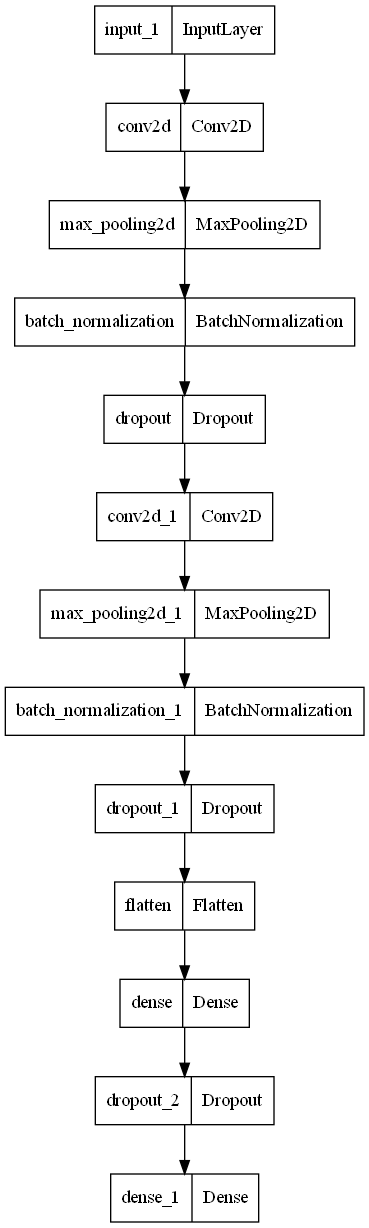

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model)

#### Training network

In [29]:
batch_size=32

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=batch_size,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                             min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])


Epoch 1/40
1182/1182 [==============================] - 36s 29ms/step - loss: 0.4692 - accuracy: 0.8499 - f1_metric: 0.8020 - recall_metric: 0.8149 - precision_metric: 0.7908 - val_loss: 0.1031 - val_accuracy: 0.9693 - val_f1_metric: 0.9584 - val_recall_metric: 0.9661 - val_precision_metric: 0.9508 - lr: 1.0000e-04
Epoch 2/40
1182/1182 [==============================] - 28s 24ms/step - loss: 0.1502 - accuracy: 0.9523 - f1_metric: 0.9372 - recall_metric: 0.9459 - precision_metric: 0.9288 - val_loss: 0.0683 - val_accuracy: 0.9776 - val_f1_metric: 0.9716 - val_recall_metric: 0.9759 - val_precision_metric: 0.9675 - lr: 1.0000e-04
Epoch 3/40
1182/1182 [==============================] - 29s 24ms/step - loss: 0.1006 - accuracy: 0.9687 - f1_metric: 0.9585 - recall_metric: 0.9649 - precision_metric: 0.9523 - val_loss: 0.0626 - val_accuracy: 0.9786 - val_f1_metric: 0.9743 - val_recall_metric: 0.9770 - val_precision_metric: 0.9716 - lr: 1.0000e-04
Epoch 4/40
1182/1182 [===========================

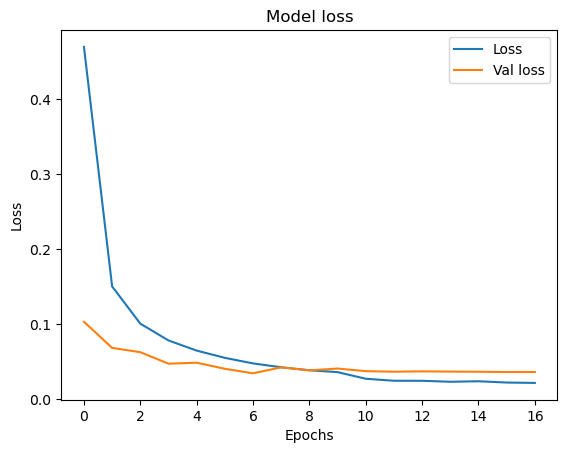

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val loss'])

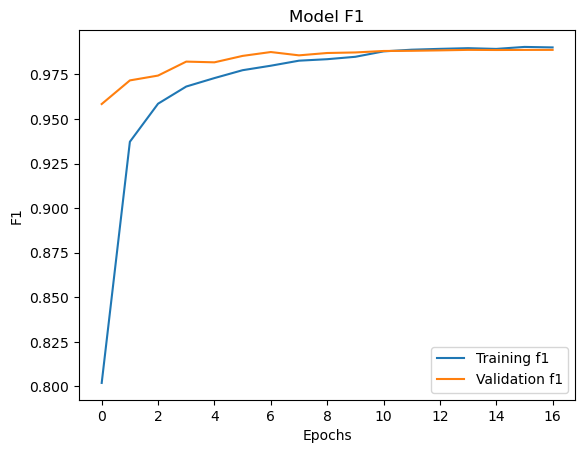

In [32]:
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])
plt.title('Model F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(['Training f1','Validation f1'])

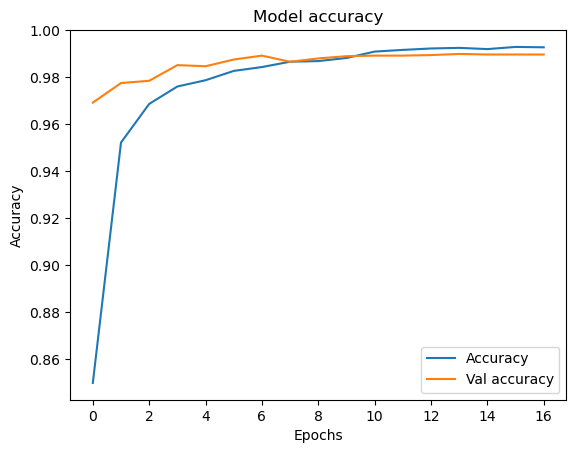

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val accuracy'])

#### Validation results

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_pred

132/132 [==============================] - 1s 8ms/step


array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

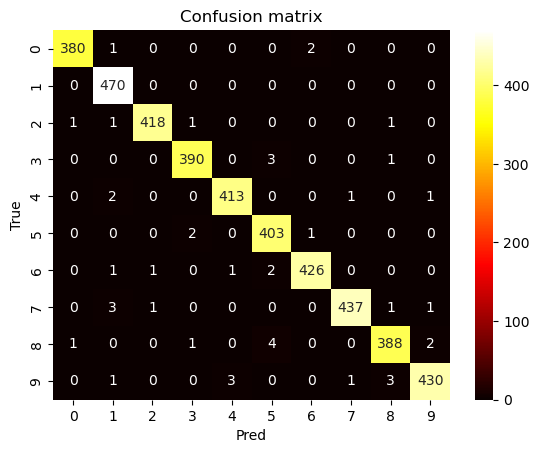

In [36]:
cm = confusion_matrix(np.argmax(y_val,axis=1), y_val_pred)
sns.heatmap(cm, annot=True, cmap='hot', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

In [37]:
y_val_true = np.argmax(y_val,axis=1)
y_val_true

array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val_true, y_val_pred)

0.9892857142857143

In [39]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
test_results = pd.DataFrame({'ImageID': np.arange(1,28001,1), 'Label': y_test_pred})

875/875 [==============================] - 6s 7ms/step


In [40]:
model.save(file_dir+r'\models\model_1')

INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\models\model_1\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\models\model_1\assets


#### Review of incorrectly classified examples

In [41]:
cm_index = cm
np.fill_diagonal(cm_index,0)
cm_index = np.where(cm_index==cm_index.max())
if len(cm_index)>1:
    cm_index = [cm_index[0][0],cm_index[1][0]]
cm_index

[8, 5]

In [42]:
cm_index

[8, 5]

In [43]:
nine_incorrect_examples = X_val[(y_val_true==cm_index[0]) & (y_val_pred==cm_index[1])]
nine_incorrect_examples = nine_incorrect_examples.reshape(-1,28,28)

In [44]:
filters_layer_1 = model.layers[1].get_weights()[0]
filters_layer_1 = np.squeeze(filters_layer_1).reshape(32,5,5)

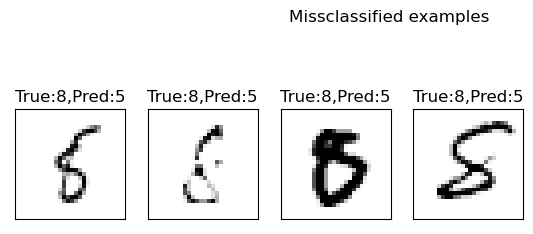

In [45]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Missclassified examples')
w = 10
h = 10
columns = 6
rows = 6
for i in range(columns*rows +1):
    if i==nine_incorrect_examples.shape[0]:
        break
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(nine_incorrect_examples[i], cmap='Greys')
    plt.title('True:{},Pred:{}'.format(cm_index[0],cm_index[1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

#### Visualizing filters and feature-maps

In [46]:
model.layers

In [47]:
model.layers[1].get_weights()[0].shape

(5, 5, 1, 32)

In [48]:
filters_layer_1 = model.layers[1].get_weights()[0]
filters_layer_1 = np.squeeze(filters_layer_1).reshape(32,5,5)

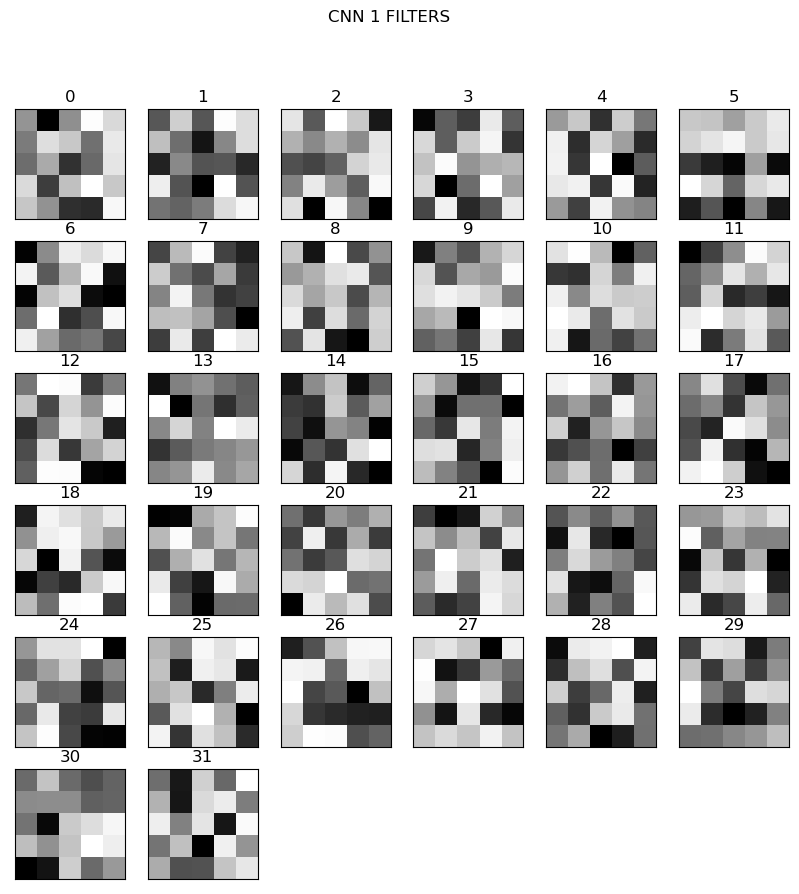

In [49]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('CNN 1 FILTERS')
w = 10
h = 10
columns = 6
rows = 6
for i in range(columns*rows +1):
    if i==filters_layer_1.shape[0]:
        break
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(filters_layer_1[i], cmap='Greys')
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [50]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 conv2d (None, 28, 28, 32)
5 conv2d_1 (None, 14, 14, 64)


In [51]:
successive_outputs = [layer.output for layer in model.layers[1:]]
fm_model = keras.Model(inputs=model.input, outputs=successive_outputs)

successive_outputs

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'batch_normalization')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'batch_normalization_1')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 3136) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (cr

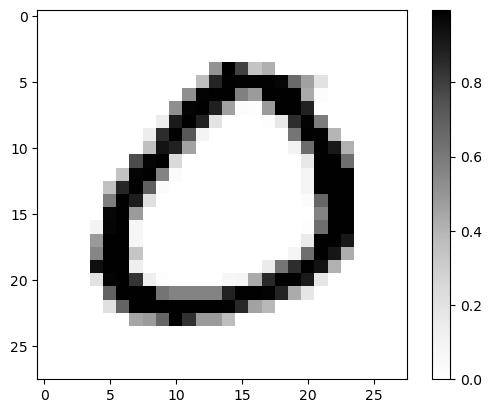

1/1 [==============================] - 0s 101ms/step


12

In [52]:
test_example = X_train[[9]]
plt.imshow(test_example[0], cmap='Greys')
plt.colorbar()
plt.show()
successive_feature_maps = fm_model.predict(test_example)
len(successive_feature_maps) # 12 for 12 layers

(1, 28, 28, 32)
input_1
(1, 14, 14, 32)
conv2d
(1, 14, 14, 32)
max_pooling2d
(1, 14, 14, 32)
batch_normalization
(1, 14, 14, 64)
dropout
(1, 7, 7, 64)
conv2d_1
(1, 7, 7, 64)
max_pooling2d_1
(1, 7, 7, 64)
batch_normalization_1
(1, 3136)
dropout_1
(1, 256)
flatten
(1, 256)
dense
(1, 10)
dropout_2


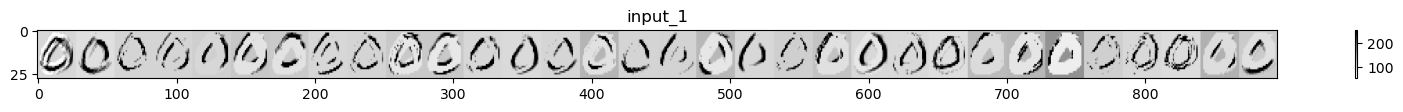

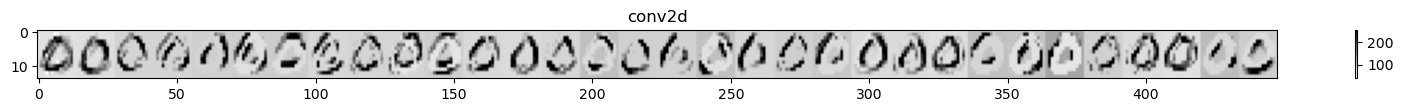

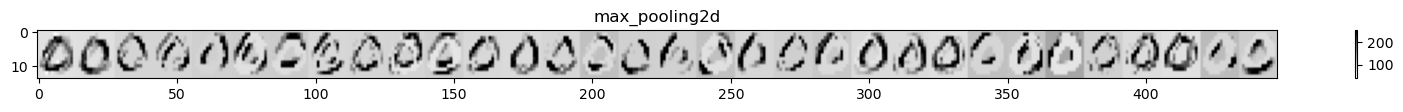

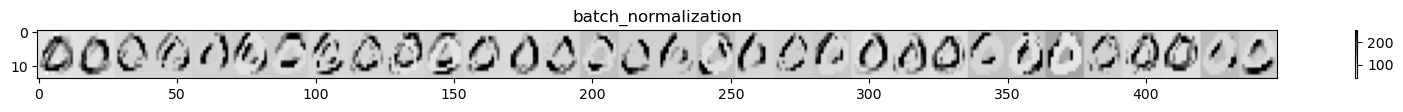

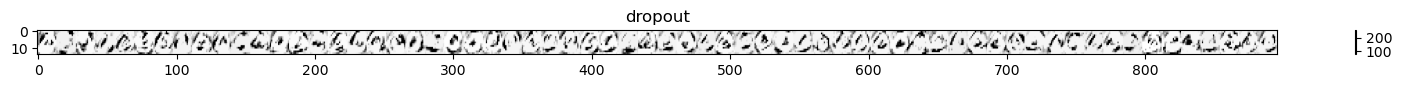

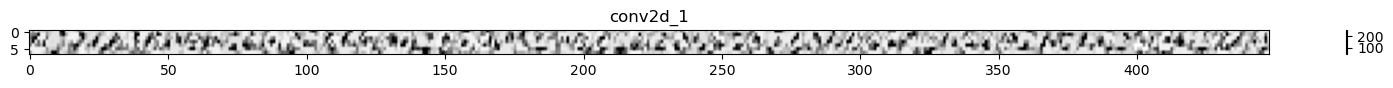

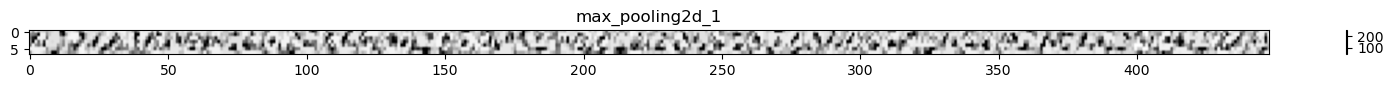

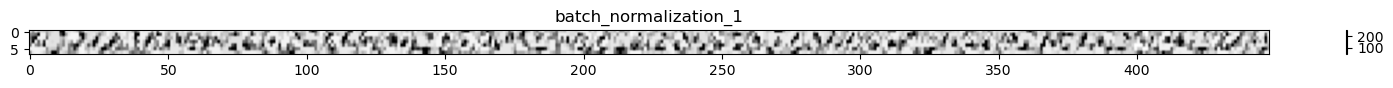

In [53]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    print(layer_name)
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
        # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title(layer_name) 
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='Greys' )
        plt.colorbar()
plt.show()

###  Data augmentation

#### Creating an ImageDataGenerator

In [54]:
from keras.preprocessing.image import ImageDataGenerator

In [55]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        zoom_range = 0.10,  
)

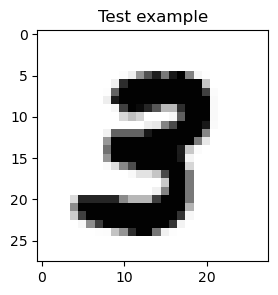

In [56]:
temp_example_X = X_train[1].reshape(-1,28,28,1)
temp_example_y = y_train[1].reshape(-1,10)
plt.figure(figsize=(3,3))
plt.title('Test example')
plt.imshow(temp_example_X.squeeze(), cmap='Greys')

#### Augmented images visualized

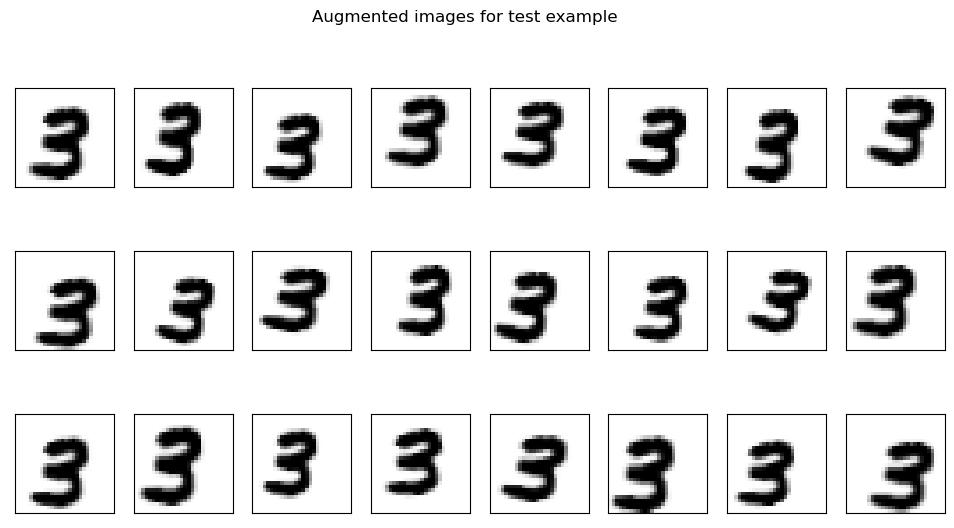

In [57]:
fig, axes = plt.subplots(3,8, figsize=(12,6))
fig.suptitle('Augmented images for test example')
for i in range(3):
    for j in range(8):
        augmented_example_X, augmented_example_y = datagen.flow(temp_example_X, temp_example_y, batch_size=1).next()
        axes[i,j].imshow(augmented_example_X.squeeze(), cmap='Greys')
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

#### Training network on augmented data

In [58]:
model2, _, _ = build_model()

In [59]:
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [60]:
steps_per_epoch = train_generator.n // train_generator.batch_size
steps_per_epoch

1181

In [61]:
print(train_generator.n, train_generator.batch_size)

37800 32


In [62]:
history2 = model2.fit(train_generator, validation_data=(X_val, y_val), epochs=40, steps_per_epoch=steps_per_epoch,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                            min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])

Epoch 1/40
1181/1181 [==============================] - 31s 25ms/step - loss: 0.7992 - accuracy: 0.7388 - f1_metric: 0.6576 - recall_metric: 0.6667 - precision_metric: 0.6515 - val_loss: 0.1089 - val_accuracy: 0.9698 - val_f1_metric: 0.9506 - val_recall_metric: 0.9631 - val_precision_metric: 0.9386 - lr: 1.0000e-04
Epoch 2/40
1181/1181 [==============================] - 33s 28ms/step - loss: 0.2842 - accuracy: 0.9110 - f1_metric: 0.8784 - recall_metric: 0.8938 - precision_metric: 0.8640 - val_loss: 0.0647 - val_accuracy: 0.9788 - val_f1_metric: 0.9710 - val_recall_metric: 0.9770 - val_precision_metric: 0.9650 - lr: 1.0000e-04
Epoch 3/40
1181/1181 [==============================] - 38s 32ms/step - loss: 0.1973 - accuracy: 0.9388 - f1_metric: 0.9177 - recall_metric: 0.9295 - precision_metric: 0.9064 - val_loss: 0.0547 - val_accuracy: 0.9824 - val_f1_metric: 0.9762 - val_recall_metric: 0.9806 - val_precision_metric: 0.9720 - lr: 1.0000e-04
Epoch 4/40
1181/1181 [===========================

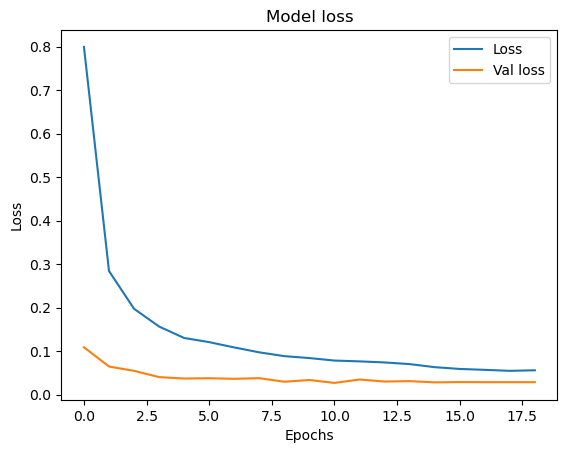

In [63]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val loss'])

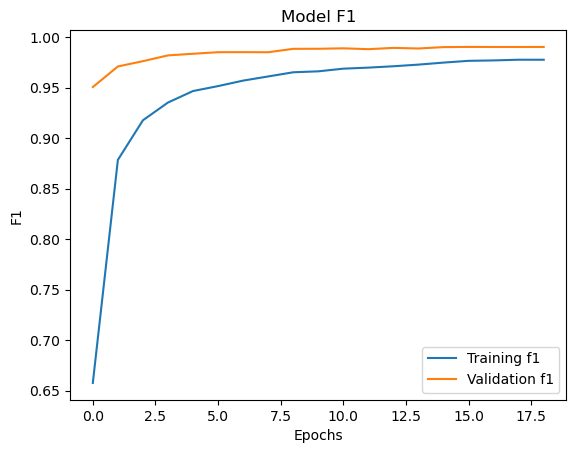

In [64]:
plt.plot(history2.history['f1_metric'])
plt.plot(history2.history['val_f1_metric'])
plt.title('Model F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(['Training f1','Validation f1'])

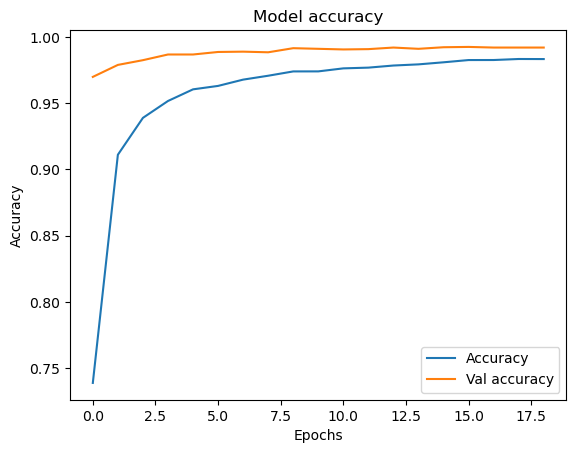

In [65]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val accuracy'])

#### Validation results on augmented data

In [66]:
y_val_pred = np.argmax(model2.predict(X_val), axis=1)
y_val_pred

132/132 [==============================] - 1s 11ms/step


array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

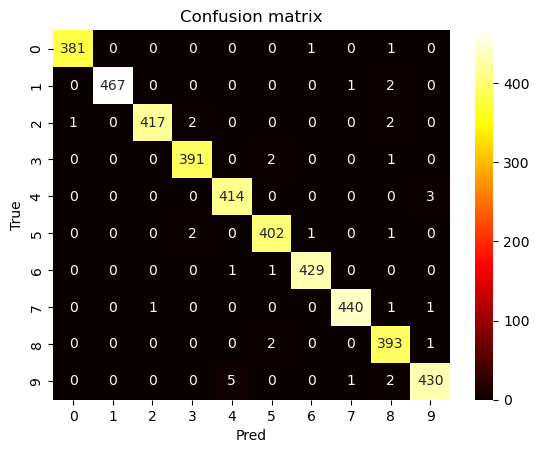

In [67]:
sns.heatmap(confusion_matrix(np.argmax(y_val,axis=1), y_val_pred), annot=True, cmap='hot', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

In [68]:
accuracy_score(y_val_true, y_val_pred)

0.9914285714285714

In [69]:
y_test_pred = model2.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
test_results = pd.DataFrame({'ImageID': np.arange(1,28001,1), 'Label': y_test_pred})

875/875 [==============================] - 8s 9ms/step


In [70]:
model2.save(file_dir+r'\models\model_2')

INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\models\model_2\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\models\model_2\assets


### Hyper-parameter tuning

#### Building hyper-parameter model

In [71]:
import keras_tuner as kt

In [72]:
def build_model_hp(hp):
    inp = keras.layers.Input(shape=[28,28,1])
    
    dropout = hp.Choice('conv_block_dropout', [0.125,0.25,0.375,0.5])
    conv_kernel_size = hp.Choice('conv_kernel_size', [5]) # Kernel size 5 is optimal after mutliple testing experiments
    
    n_layers = hp.Choice('n_conv_blocks', [2,3,4])

    filter_choice = hp.Choice('filter_combination_choice', [0,1,2,3])
    
    filter_combinations_2 = [[16,32],[32,64],[64,128],[128,256]]
    filter_combinations_3 = [[16,32,48],[16,32,64],[32,64,128],[64,128,256]]
    filter_combinations_4 = [[16,16,32,32],[32,32,64,64],[64,64,128,128],[128,128,256,256]]

    if n_layers==2:
        filter_settings = filter_combinations_2[filter_choice]
    elif n_layers==3:
        filter_settings = filter_combinations_3[filter_choice]
    elif n_layers==4:
        filter_settings = filter_combinations_4[filter_choice]
        
    for i in range(n_layers):
        if i == 0:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(inp)
        else:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(x)

        x = keras.layers.MaxPool2D(pool_size=2)(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dropout(dropout)(x)
            
    x = keras.layers.Flatten()(x) 
    
    n_fc_layers = hp.Choice('n_fc_layers', [1,2,3])
    
    fc_choice = hp.Choice('fc_units_combination_choice', [0,1])
    
    fc_combinations_1 = [[128],[256]]
    fc_combinations_2 = [[128,64],[256,128]]
    fc_combinations_3 = [[512,256,128],[256,128,64]]
    
    if n_fc_layers==1:
        fc_units = fc_combinations_1[fc_choice]
    elif n_fc_layers==2:
        fc_units = fc_combinations_2[fc_choice]
    elif n_fc_layers==3:
        fc_units = fc_combinations_3[fc_choice]
    
    for j in range(n_fc_layers):
        x = keras.layers.Dense(fc_units[j], activation='relu')(x)
        x = keras.layers.Dropout(hp.Choice('fc_dropout', [0.125,0.25,0.5]))(x)
    
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs=inp, outputs=out)
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    
    return model

In [73]:
tuner = kt.RandomSearch(hypermodel=build_model_hp, objective='val_loss', max_trials=200, 
                       overwrite=False, project_name='random_search')

In [74]:
tuner = kt.Hyperband(hypermodel=build_model_hp, objective='val_loss', max_epochs=50, executions_per_trial=2,
                        overwrite=False, project_name='hyperband_results')

INFO:tensorflow:Reloading Tuner from .\hyperband_results\tuner0.json


INFO:tensorflow:Reloading Tuner from .\hyperband_results\tuner0.json


In [75]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
conv_block_dropout (Choice)
{'default': 0.125, 'conditions': [], 'values': [0.125, 0.25, 0.375, 0.5], 'ordered': True}
conv_kernel_size (Choice)
{'default': 5, 'conditions': [], 'values': [5], 'ordered': True}
n_conv_blocks (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
filter_combination_choice (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1, 2, 3], 'ordered': True}
n_fc_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
fc_units_combination_choice (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1], 'ordered': True}
fc_dropout (Choice)
{'default': 0.125, 'conditions': [], 'values': [0.125, 0.25, 0.5], 'ordered': True}


#### Hyper-parameter search (using HyperBand)

In [76]:
tuner.search(train_generator, validation_data=(X_val, y_val), epochs=30, steps_per_epoch=steps_per_epoch,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10,
                                                      min_delta=0.005, restore_best_weights=True),
                       keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [77]:
top_model = tuner.get_best_models(1)[0]
top_model_hps = tuner.get_best_hyperparameters(1)[0]
print(top_model_hps.values)
top_model.summary()

{'conv_block_dropout': 0.125, 'conv_kernel_size': 5, 'n_conv_blocks': 4, 'filter_combination_choice': 3, 'n_fc_layers': 1, 'fc_units_combination_choice': 1, 'fc_dropout': 0.125, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                      

In [78]:
y_val_true = np.argmax(y_val,axis=1)
y_val_pred = np.argmax(top_model.predict(X_val), axis=1)
accuracy_score(y_val_true, y_val_pred)

132/132 [==============================] - 6s 48ms/step


0.9938095238095238

In [79]:
tuner.results_summary(5)

Results summary
Results in .\hyperband_results
Showing 5 best trials
Trial summary
Hyperparameters:
conv_block_dropout: 0.125
conv_kernel_size: 5
n_conv_blocks: 4
filter_combination_choice: 3
n_fc_layers: 1
fc_units_combination_choice: 1
fc_dropout: 0.125
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0048
Score: 0.01841664593666792
Trial summary
Hyperparameters:
conv_block_dropout: 0.125
conv_kernel_size: 5
n_conv_blocks: 4
filter_combination_choice: 3
n_fc_layers: 1
fc_units_combination_choice: 1
fc_dropout: 0.125
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.019203211180865765
Trial summary
Hyperparameters:
conv_block_dropout: 0.125
conv_kernel_size: 5
n_conv_blocks: 4
filter_combination_choice: 3
n_fc_layers: 1
fc_units_combination_choice: 0
fc_dropout: 0.5
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0039
Score: 0.01996180508285761
Trial summ

In [80]:
top_2_models = tuner.get_best_models(2)
top_2_models

In [81]:
top_3_models = tuner.get_best_models(3)
top_3_models

In [82]:
top_5_models = tuner.get_best_models(5)
top_5_models

In [83]:
top_10_models = tuner.get_best_models(10)
top_10_models

In [84]:
def ensemble_models(models, data):
    results = np.zeros((data.shape[0],10))
    for i in range(len(models)):
        results = results + models[i].predict(data)
    
    results = np.argmax(results, axis=1)
    results = pd.Series(results, name='Label')
    return results

In [85]:
results = ensemble_models(top_2_models, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 6s 47ms/step
Accuracy 0.9945238095238095


In [86]:
results = ensemble_models(top_3_models, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 6s 46ms/step
Accuracy 0.9947619047619047


In [87]:
results = ensemble_models(top_3_models, X_test)
results = pd.concat([pd.Series(np.arange(1,X_test.shape[0]+1,1),name = "ImageId"),results],axis = 1)
results.to_csv(r'test_results.csv', index=False)

875/875 [==============================] - 41s 46ms/step


In [88]:
def build_best_model():
    inp = keras.layers.Input(shape=[28,28,1])
    
    conv_dropout = 0.375
    
    conv_kernel_size = 5
    
    n_layers = 4

    filter_settings = [64,64,128,128]
        
    for i in range(n_layers):
        if i == 0:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(inp)
        else:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(x)

        x = keras.layers.MaxPool2D(pool_size=2)(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dropout(conv_dropout)(x)
            
    x = keras.layers.Flatten()(x) 
    
    n_fc_layers = 1
        
    fc_units = [256]

    fc_dropout = 0.25
    
    for j in range(n_fc_layers):
        x = keras.layers.Dense(fc_units[j], activation='relu')(x)
        x = keras.layers.Dropout(fc_dropout)(x)
    
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs=inp, outputs=out)
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    
    return model

In [89]:
n_models = 10
models = [0]*10
for i in range(n_models):
    models[i] = build_best_model()

In [90]:
historys = [0]*n_models
for i in range(n_models):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1) #Random data each time
    
    X_train = features_pipeline.fit_transform(X_train)
    y_train = target_pipeline.fit_transform(y_train.values.reshape(-1,1))
    y_train = y_train.toarray()
    
    X_val = features_pipeline.fit_transform(X_val)
    y_val = target_pipeline.fit_transform(y_val.values.reshape(-1, 1))
    y_val = y_val.toarray()
    
    train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
    
    historys[i] = models[i].fit(train_generator, validation_data=(X_val, y_val), epochs=40, steps_per_epoch=steps_per_epoch,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                            min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)], verbose=0)
    
    models[i].save(file_dir+r'\top_model_ensemble\model_{}'.format(str(i)))
    
    idx = np.argmin(historys[i].history['val_loss'])
    print('Model: {} || Training loss: {}, Validation loss: {}, Training accuracy: {}, Validation accuracy: {}'.format(
    i+1, round(historys[i].history['loss'][idx], 4), round(historys[i].history['val_loss'][idx], 4), 
        round(historys[i].history['accuracy'][idx], 4), round(historys[i].history['val_accuracy'][idx], 4))
         )

INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_0\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_0\assets


Model: 1 || Training loss: 0.0294, Validation loss: 0.0141, Training accuracy: 0.9909, Validation accuracy: 0.9955


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_1\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_1\assets


Model: 2 || Training loss: 0.0387, Validation loss: 0.024, Training accuracy: 0.9885, Validation accuracy: 0.9931


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_2\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_2\assets


Model: 3 || Training loss: 0.0341, Validation loss: 0.0127, Training accuracy: 0.9903, Validation accuracy: 0.9969


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_3\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_3\assets


Model: 4 || Training loss: 0.032, Validation loss: 0.0102, Training accuracy: 0.9904, Validation accuracy: 0.9964


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_4\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_4\assets


Model: 5 || Training loss: 0.0356, Validation loss: 0.019, Training accuracy: 0.9891, Validation accuracy: 0.9936


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_5\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_5\assets


Model: 6 || Training loss: 0.0319, Validation loss: 0.0173, Training accuracy: 0.9904, Validation accuracy: 0.9952


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_6\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_6\assets


Model: 7 || Training loss: 0.0397, Validation loss: 0.0177, Training accuracy: 0.9888, Validation accuracy: 0.994


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_7\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_7\assets


Model: 8 || Training loss: 0.0329, Validation loss: 0.0119, Training accuracy: 0.9909, Validation accuracy: 0.9976


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_8\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_8\assets


Model: 9 || Training loss: 0.0351, Validation loss: 0.0247, Training accuracy: 0.9889, Validation accuracy: 0.9943


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_9\assets


INFO:tensorflow:Assets written to: C:\Users\hasna\anaconda3\envs\top_model_ensemble\model_9\assets


Model: 10 || Training loss: 0.0401, Validation loss: 0.0208, Training accuracy: 0.9885, Validation accuracy: 0.9931


In [109]:
models_val_acc = [0.9955, 0.9931, 0.9969, 0.9964, 0.9936, 0.9952, 0.994, 0.9976, 0.9943, 0.9931]

In [110]:
try:
    models
except:
    n_models = 10
    models = [0]*10
    for i in range(n_models):
        models[i] = keras.models.load_model(file_dir+r'\top_model_ensemble\model_{}'.format(str(i)),
                                           custom_objects={'f1_metric':f1_metric, 'recall_metric':recall_metric,
                                                          'precision_metric':precision_metric})

In [111]:
# models_ordered
models_val_idxs = np.argsort(models_val_acc)[::-1]
models_val_idxs

array([7, 2, 3, 0, 5, 8, 6, 4, 9, 1], dtype=int64)

In [112]:
models_ordered = np.array(models)[models_val_idxs]
models_ordered

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>,
      dtype=object)

In [113]:
models_ordered_1 = models_ordered[0:1]
models_ordered_1

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>],
      dtype=object)

In [114]:
models_ordered_2 = models_ordered[0:2]
models_ordered_2

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>,
      dtype=object)

In [115]:
models_ordered_3 = models_ordered[0:3]
models_ordered_3

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>,
      dtype=object)

In [116]:
models_ordered_5 = models_ordered[0:5]
models_ordered_5

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>,
      dtype=object)

In [117]:
models_ordered_10 = models_ordered[0:10]
models_ordered_10

array([<keras.engine.functional.Functional object at 0x000002751BAE0910>,
      dtype=object)

In [118]:
y_val_true = np.argmax(y_val,axis=1)
y_val_true

array([9, 1, 9, ..., 4, 8, 9], dtype=int64)

In [119]:
results = ensemble_models(models_ordered_1, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 3s 19ms/step
Accuracy 0.9966666666666667


In [120]:
results = ensemble_models(models_ordered_2, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 2s 15ms/step
Accuracy 0.9964285714285714


In [121]:
results = ensemble_models(models_ordered_3, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 2s 15ms/step
Accuracy 0.9966666666666667


In [122]:
results = ensemble_models(models_ordered_5, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 2s 17ms/step
Accuracy 0.9966666666666667


In [123]:
results = ensemble_models(models_ordered_10, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 2s 16ms/step
Accuracy 0.9959523809523809


In [106]:
results = ensemble_models(models_ordered_1, X_test)
results = pd.concat([pd.Series(np.arange(1,X_test.shape[0]+1,1),name = "ImageId"),results],axis = 1)
results.to_csv(r'test_results.csv', index=False)

875/875 [==============================] - 13s 14ms/step


In [107]:
name_list = ['Model 1', 'Model 2', 'Best model','Ensembling top 3 models (different settings)', 'Ensembling top 3 models (same settings)' ]
results_list = [0.99,0.990238,0.993809,0.99476,0.99595]
pd.DataFrame({'Model':name_list, 'Test accuracy':results_list}).sort_values(by='Test accuracy', ascending=0)

,Model,Test accuracy
4,Ensembling top 3 models (same settings),0.995950
3,Ensembling top 3 models (different settings),0.994760
2,Best model,0.993809
1,Model 2,0.990238
0,Model 1,0.990000
